**Analisi diffusione COVID-19 nel mondo**

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [186]:
# Librerie:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import humanize

In [187]:
# Importare il csv e convertirlo in data frame

csv = "owid-covid-data copia.csv"
df = pd.read_csv(csv)

**Si richiede di verificare le dimensioni del dataset e i relativi metadati**

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388909 entries, 0 to 388908
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388909 non-null  object 
 1   continent                                   370325 non-null  object 
 2   location                                    388909 non-null  object 
 3   date                                        388909 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

Il dataset contiene 128.103 valori organizzati in 67 colonne. 
I metadati indicano che 62 colonne contengono valori decimali (float64), mentre le restanti 5 valori categorici. 
Tuttavia si può già riscontrare che la colonna "data" dovrà essere riformattata durante la pulizia del dataframe. Lo stesso per quei valori float che però vanno gestiti come degli interi.

In [189]:
# Pulizia del data frame

# object>data
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# float>int
float_columns = ["total_cases", "new_cases", "icu_patients", "hosp_patients"]
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# rimozione dei valori aggregati 
# - OWID: gruppi e regioni aggregati da Our World in Data
# - alcuni continenti sono collocati nella sezione "location"

df = df[~df["iso_code"].str.contains("^OWID_", na=False)]

unique_continents = df["continent"].unique()
df = df[~df["location"].isin(unique_continents)]

In [203]:
# verifica del buon esito dell'operazione
df[["iso_code", "continent", "location", "date", "total_cases", "new_cases", "icu_patients", "hosp_patients"]].sample(40)

,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
379404,VNM,Asia,Vietnam,2022-08-13,11346137,0,<NA>,<NA>
138201,GUM,Oceania,Guam,2023-02-09,50725,0,<NA>,<NA>
351827,TTO,North America,Trinidad and Tobago,2023-02-05,187908,323,<NA>,<NA>
287370,RWA,Africa,Rwanda,2022-09-07,132449,0,<NA>,<NA>
32963,BEL,Europe,Belgium,2021-08-04,1118021,0,92,367
213281,MTQ,North America,Martinique,2023-11-14,230354,0,<NA>,<NA>
175284,KAZ,Asia,Kazakhstan,2023-05-14,1502857,0,<NA>,<NA>
27196,BHR,Asia,Bahrain,2022-09-15,673693,0,<NA>,<NA>
221978,MDA,Europe,Moldova,2022-05-10,517753,0,<NA>,<NA>
365911,GBR,Europe,United Kingdom,2023-09-08,24696465,0,<NA>,<NA>


**Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;** 
**si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente**

In [191]:
#eliminazione dei valori nulli e funzione di raggruppamento per continente

df_drop_nanvalues = df.dropna(subset=["new_cases"])
df_drop_nanvalues.groupby("continent")["new_cases"].sum()

continent
Africa            13141439
Asia             301451451
Europe           252142905
North America    124530677
Oceania           14814266
South America     68844492
Name: new_cases, dtype: Int64

**Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici:**
**1) valore massimo**
**2) media**
**3) percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)**

In [192]:
def selezione(valore1, valore2, df_drop_nanvalues):
    lista_continenti = ["Oceania", "Africa", "Asia", "Europe", "North America", "South America"]

    if valore1 in lista_continenti and valore2 in lista_continenti:
        continente1 = df_drop_nanvalues[df_drop_nanvalues["continent"] == valore1]
        continente2 = df_drop_nanvalues[df_drop_nanvalues["continent"] == valore2]
        tot_casi_globali = df_drop_nanvalues["total_cases"].sum()

        max_continente1 = continente1["total_cases"].max()
        media_continente1 = (continente1["total_cases"].mean())
        percentuale_continente1 = ((continente1["total_cases"].sum() / tot_casi_globali) * 100).round(2)
        max_continente2 = continente2["total_cases"].max()
        media_continente2 = (continente2["total_cases"].mean())
        percentuale_continente2 = ((continente2["total_cases"].sum() / tot_casi_globali) * 100).round(2)

        return f"I due continenti selezionati sono {valore1} e {valore2}.\nIl primo ha riscontrato un massimo di casi totali pari a {humanize.intword(max_continente1)} mentre il secondo {humanize.intword(max_continente2)}.\nLa media per ciascuno è rispettivamente di {humanize.intword(media_continente1)} e di {humanize.intword(media_continente2)}.\nInfine, l'{valore1} rappresenta {percentuale_continente1}% dei casi globali, mentre l'{valore2} si attesta al {percentuale_continente2}%."
    else:
        return "Continenti non validi. Assicurati di selezionare due continenti dalla lista: Oceania, Africa, Asia, Europe, North America, South America."

valore1 = input("Scegli un continente (Oceania, Africa, Asia, Europe, North America, South America): ")
valore2 = input("Scegline un altro: ")

result = selezione(valore1, valore2, df_drop_nanvalues)
print(result)

Continenti non validi. Assicurati di selezionare due continenti dalla lista: Oceania, Africa, Asia, Europe, North America, South America.


Per questa richiesta, ho preparato una funzione con tre parametri: i due valori scelti dall'utente, che corrispondono ai nomi dei continenti, e filter_date_df, che rappresenta il dataframe filtrato precedentemente.

Ho verificato che i nomi dei continenti inseriti dall'utente fossero corretti, utilizzando una lista di controllo con i nomi dei continenti validi.

Successivamente, ho creato un filtro per calcolare il totale dei casi globali presenti nel dataframe.

Poi ho eseguito i calcoli richiesti dall'esercizio utilizzando i nomi dei continenti inseriti dall'utente come chiavi per filtrare i casi totali.

Infine, ho utilizzato il comando di input per fornire maggiore flessibilità all'utente nella selezione dell'area geografica e ho assegnato il risultato della funzione, con i relativi argomenti, alla variabile result. Ho impiegato la funzione .round() e la libreria humanize per rendere le informazioni piu' immediate.

**Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.**

In [193]:
# Preparazione e applicazione del filtro
ita_mask = (df_drop_nanvalues["location"] == "Italy") & ("2022-01-01" < df_drop_nanvalues["date"]) & (df_drop_nanvalues["date"] < "2022-12-31")
casi_italia_2022 = df_drop_nanvalues[ita_mask]

# Semplificazione dei numeri per la visualizzazione dati
casi_italia_2022["total_cases"] = casi_italia_2022["total_cases"] / 1_000_000

# Reset dell'indice
casi_italia_2022.reset_index(drop=True, inplace=True)
casi_italia_2022.index = casi_italia_2022.index + 1

# Controllo della tabella
casi_italia_2022[["total_cases", "date"]]

/var/folders/j2/m4qt_gps3db3y1082f6kpq2w0000gn/T/ipykernel_44431/1650572463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casi_italia_2022["total_cases"] = casi_italia_2022["total_cases"] / 1_000_000


,total_cases,date
1,6.267035,2022-01-02
2,6.267035,2022-01-03
3,6.267035,2022-01-04
4,6.267035,2022-01-05
5,6.267035,2022-01-06
...,...,...
359,25.060503,2022-12-26
360,25.060503,2022-12-27
361,25.060503,2022-12-28
362,25.060503,2022-12-29


/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

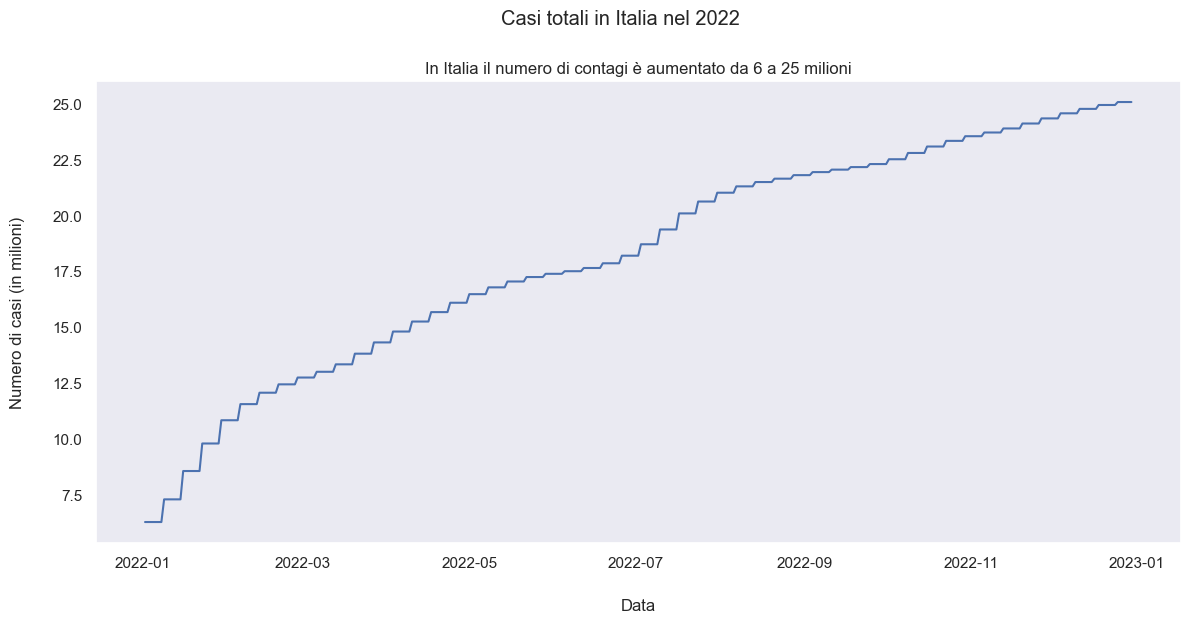

In [194]:
# Impostazione dello stile
sb.set_theme(style = "dark")

# Impostazione delle dimensioni
plt.figure(figsize = (14, 6))

# Creazione del grafico
andamento_casi_totali = sb.lineplot(data = casi_italia_2022, x = "date", y = "total_cases")

# Imposto le etichette e lo spazio tra esse e gli altri elementi del grafico
andamento_casi_totali.set_ylabel("Numero di casi (in milioni)", labelpad=20) 
andamento_casi_totali.set_xlabel("Data", labelpad = 20) 

# Titolo e sottotitolo
plt.title("In Italia il numero di contagi è aumentato da 6 a 25 milioni")
plt.suptitle("Casi totali in Italia nel 2022", y = 1)

plt.show()

**Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).**

In [195]:
# Ho notato che i dati venivano riportati settimanalimente dunque ho evitato di rappresentare i valori "0.0"
casi_italia_settimanali_2022 = casi_italia_2022[casi_italia_2022["new_cases"] != float(0)]
casi_italia_settimanali_2022.loc[:, "new_cases"] = casi_italia_2022["new_cases"] / 1_000
casi_italia_settimanali_2022.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
64,ITA,Europe,Italy,2022-03-06,12.990223,257.543,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472.0,178133.80,12.48,0.86,3017.3005
288,ITA,Europe,Italy,2022-10-16,23.069745,288.452,41207.429,177956.0,478.0,68.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,222069.20,12.35,5.66,3761.4958
57,ITA,Europe,Italy,2022-02-27,12.73268,304.907,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,178015.30,12.60,0.06,3015.2935
267,ITA,Europe,Italy,2022-09-25,22.284812,135.877,19411.000,176867.0,321.0,45.857,...,27.8,NaN,3.18,83.51,0.892,59037472.0,218970.31,12.41,5.65,3709.0056
15,ITA,Europe,Italy,2022-01-16,8.54945,1268.153,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472.0,170089.10,12.83,8.03,2881.0361
43,ITA,Europe,Italy,2022-02-13,12.05333,510.537,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,177489.48,12.81,8.88,3006.3870
260,ITA,Europe,Italy,2022-09-18,22.148935,113.218,16174.000,176546.0,371.0,53.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,218356.61,12.45,8.38,3698.6104
50,ITA,Europe,Italy,2022-02-20,12.427773,374.443,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472.0,178007.39,12.72,3.66,3015.1594
127,ITA,Europe,Italy,2022-05-08,16.767773,304.573,43510.429,164417.0,910.0,130.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,187992.30,12.22,9.48,3184.2876
197,ITA,Europe,Italy,2022-07-17,20.076863,718.925,102703.571,169846.0,784.0,112.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,200827.08,12.16,15.56,3401.6882


/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

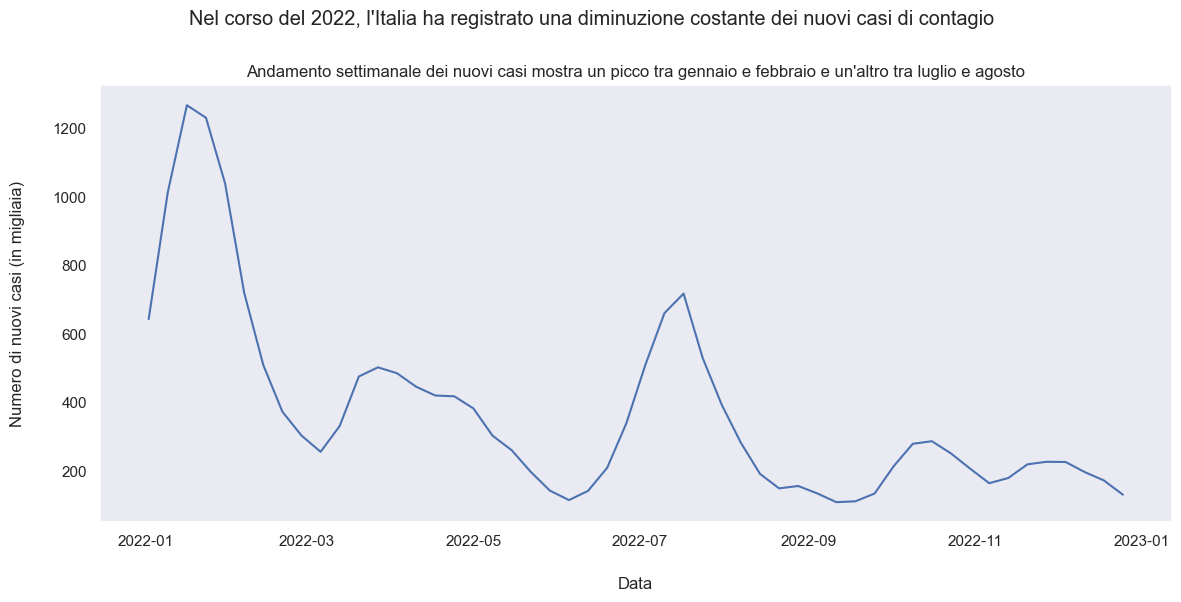

In [196]:
plt.figure(figsize=(12, 6)) 

nuovi_casi_settimanali_2022 = sb.lineplot(data=casi_italia_settimanali_2022, x = "date", y = "new_cases")


nuovi_casi_settimanali_2022.set_ylabel("Numero di nuovi casi (in migliaia)", labelpad=20) 
nuovi_casi_settimanali_2022.set_xlabel("Data", labelpad=20) 
plt.title("Andamento settimanale dei nuovi casi mostra un picco tra gennaio e febbraio e un'altro tra luglio e agosto")
plt.suptitle("Nel corso del 2022, l'Italia ha registrato una diminuzione costante dei nuovi casi di contagio", y = 1)

plt.tight_layout()
plt.show()

**Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali.**

In [197]:
casi_italia_2022.loc[:, "somma_cumulativa"] = casi_italia_2022["new_cases"].cumsum()


/var/folders/j2/m4qt_gps3db3y1082f6kpq2w0000gn/T/ipykernel_44431/2144605529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casi_italia_2022.loc[:, "somma_cumulativa"] = casi_italia_2022["new_cases"].cumsum()


/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

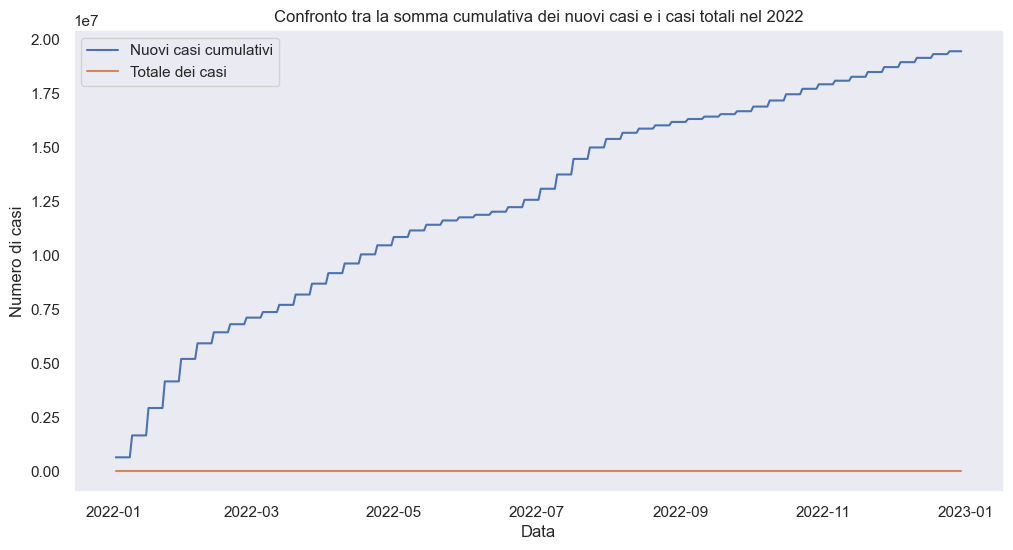

In [204]:
confronto_trend_italia = casi_italia_2022[["date", "somma_cumulativa", "total_cases"]]

plt.figure(figsize = (12, 6))

sb.lineplot(data = confronto_trend_italia, x = "date", y = "somma_cumulativa", label = "Nuovi casi cumulativi")
sb.lineplot(data = confronto_trend_italia, x = "date", y = "total_cases", label = "Totale dei casi")

plt.xlabel("Data")
plt.ylabel("Numero di casi")

plt.title("Confronto tra la somma cumulativa dei nuovi casi e i casi totali nel 2022")
plt.legend()

plt.show()

**Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo**

In [199]:
# Filtro e index
ita_ger_fra_mask = ((df_drop_nanvalues["location"] == "Italy") | (df_drop_nanvalues["location"] == "Germany") | (df_drop_nanvalues["location"] == "France")) & ("2022-05-01" < df_drop_nanvalues["date"]) & (df_drop_nanvalues["date"] < "2023-04-30")
terapia_intensiva = df_drop_nanvalues[ita_ger_fra_mask].reset_index(drop=True)
terapia_intensiva.index = terapia_intensiva.index + 1

# Eliminazione dei valori NaN
terapia_intensiva = terapia_intensiva.dropna(subset=["icu_patients"])

# Controllo della tabella
terapia_intensiva[["location", "icu_patients"]]

,location,icu_patients
1,France,1511
2,France,1498
3,France,1465
4,France,1447
5,France,1408
...,...,...
1085,Italy,100
1086,Italy,100
1087,Italy,99
1088,Italy,105


/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_i

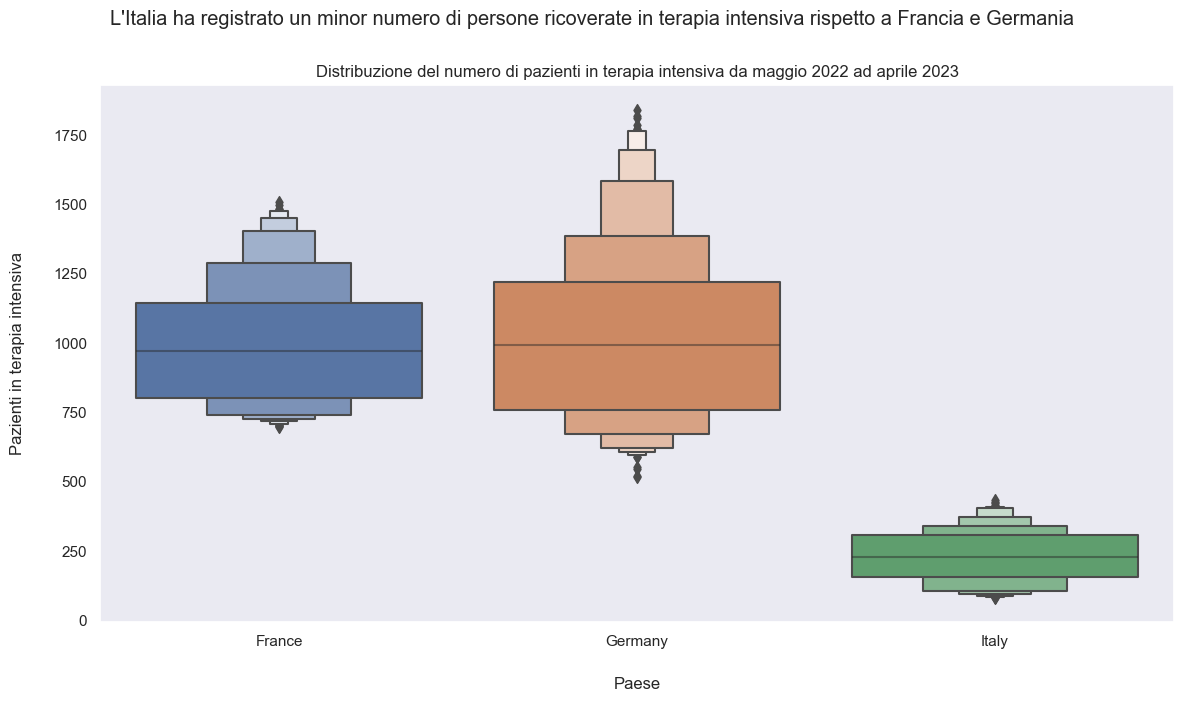

In [205]:
plt.figure(figsize=(12, 7)) 

pazienti_icu_2022_3 = sb.boxenplot(data=terapia_intensiva, x="location", y="icu_patients")

pazienti_icu_2022_3.set_xlabel("Paese", labelpad=20) 
pazienti_icu_2022_3.set_ylabel("Pazienti in terapia intensiva", labelpad=20) 

plt.title("Distribuzione del numero di pazienti in terapia intensiva da maggio 2022 ad aprile 2023")
plt.suptitle("L'Italia ha registrato un minor numero di persone ricoverate in terapia intensiva rispetto a Francia e Germania", y=1)

plt.tight_layout()
plt.show()


Il focus del grafico viene riassunto dal titolo, mentre nel sottotitolo si spiega il grafico nella sua interezza.

**Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.**

In [201]:
# Filtro
ita_ger_fra_spa_mask = ((df_drop_nanvalues["location"] == "Italy") | (df_drop_nanvalues["location"] == "Germany") | (df_drop_nanvalues["location"] == "France") | (df_drop_nanvalues["location"] == "Spain")) & ("2023-01-01" < df_drop_nanvalues["date"]) & (df_drop_nanvalues["date"] < "2023-12-31")
ospedalizzati = df_drop_nanvalues[ita_ger_fra_spa_mask][["location", "hosp_patients"]]

# Eliminazione dei valori nulli
ospedalizzati = ospedalizzati.dropna(subset=["hosp_patients"])

# Ragruppamento
somma = ospedalizzati.groupby("location")["hosp_patients"].sum().reset_index()

# Semplificazione dei numeri per la visualizzazione dati
somma["hosp_patients"] = somma["hosp_patients"]/ 1_000_000

somma

,location,hosp_patients
0,France,1.358417
1,Italy,1.160274
2,Spain,0.351301


/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescoscomazzon/miniconda3/envs/lavoro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


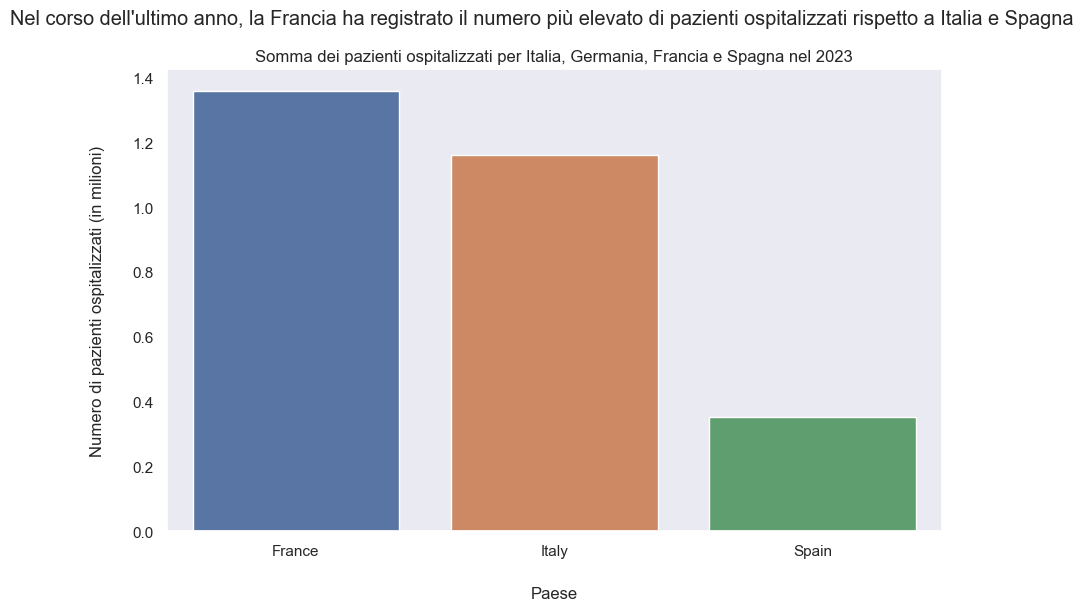

In [202]:
plt.figure(figsize=(10, 6))
grafico_ospedalizzati = sb.barplot(data=somma, x="location", y="hosp_patients")

plt.xlabel("Paese")
grafico_ospedalizzati.set_xlabel("Paese", labelpad=20) 
plt.ylabel("Numero di pazienti ospitalizzati (in milioni)")
grafico_ospedalizzati.set_ylabel("Numero di pazienti ospitalizzati (in milioni)", labelpad=20) 

plt.title("Somma dei pazienti ospitalizzati per Italia, Germania, Francia e Spagna nel 2023", y=1)
plt.suptitle("Nel corso dell'ultimo anno, la Francia ha registrato il numero più elevato di pazienti ospitalizzati rispetto a Italia e Spagna")
plt.show()

In [185]:
df = df[df["location"] == "Germany"]
df["hosp_patients"].unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

Non è stato possibile gestire l'assenza di dati in quanto la Germania non ne presentava alcuno nella colonna hosp_patients